In [1]:
from qiskit import QuantumCircuit, assemble, Aer
from qiskit.visualization import plot_histogram
from math import sqrt, pi

Create a basic circuit using qiskit. This circuit will have 8 qubits and 8 outputs.

In [2]:
quantum_circuit = QuantumCircuit(8)

In [3]:
quantum_circuit.measure_all()

In [4]:
quantum_circuit.draw(initial_state = True)

░ ┌─┐                     
  q_0: |0>─░─┤M├─────────────────────
           ░ └╥┘┌─┐                  
  q_1: |0>─░──╫─┤M├──────────────────
           ░  ║ └╥┘┌─┐               
  q_2: |0>─░──╫──╫─┤M├───────────────
           ░  ║  ║ └╥┘┌─┐            
  q_3: |0>─░──╫──╫──╫─┤M├────────────
           ░  ║  ║  ║ └╥┘┌─┐         
  q_4: |0>─░──╫──╫──╫──╫─┤M├─────────
           ░  ║  ║  ║  ║ └╥┘┌─┐      
  q_5: |0>─░──╫──╫──╫──╫──╫─┤M├──────
           ░  ║  ║  ║  ║  ║ └╥┘┌─┐   
  q_6: |0>─░──╫──╫──╫──╫──╫──╫─┤M├───
           ░  ║  ║  ║  ║  ║  ║ └╥┘┌─┐
  q_7: |0>─░──╫──╫──╫──╫──╫──╫──╫─┤M├
           ░  ║  ║  ║  ║  ║  ║  ║ └╥┘
meas: 0 8/════╩══╩══╩══╩══╩══╩══╩══╩═
              0  1  2  3  4  5  6  7

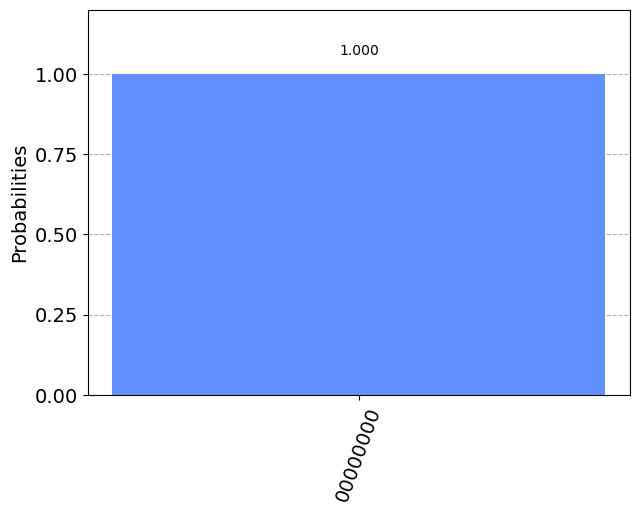

In [5]:
sim = Aer.get_backend('aer_simulator')
result = sim.run(quantum_circuit).result()
counts = result.get_counts()
plot_histogram(counts)

Quantum Circuit to represent binary numbers/age

In [10]:
qc_encode = QuantumCircuit(8)
qc_encode.x(3)
qc_encode.x(4)
qc_encode.draw()

q_0: ─────
          
q_1: ─────
          
q_2: ─────
     ┌───┐
q_3: ┤ X ├
     ├───┤
q_4: ┤ X ├
     └───┘
q_5: ─────
          
q_6: ─────
          
q_7: ─────

In [11]:
qc_encode.measure_all()
qc_encode.draw()

░ ┌─┐                     
   q_0: ──────░─┤M├─────────────────────
              ░ └╥┘┌─┐                  
   q_1: ──────░──╫─┤M├──────────────────
              ░  ║ └╥┘┌─┐               
   q_2: ──────░──╫──╫─┤M├───────────────
        ┌───┐ ░  ║  ║ └╥┘┌─┐            
   q_3: ┤ X ├─░──╫──╫──╫─┤M├────────────
        ├───┤ ░  ║  ║  ║ └╥┘┌─┐         
   q_4: ┤ X ├─░──╫──╫──╫──╫─┤M├─────────
        └───┘ ░  ║  ║  ║  ║ └╥┘┌─┐      
   q_5: ──────░──╫──╫──╫──╫──╫─┤M├──────
              ░  ║  ║  ║  ║  ║ └╥┘┌─┐   
   q_6: ──────░──╫──╫──╫──╫──╫──╫─┤M├───
              ░  ║  ║  ║  ║  ║  ║ └╥┘┌─┐
   q_7: ──────░──╫──╫──╫──╫──╫──╫──╫─┤M├
              ░  ║  ║  ║  ║  ║  ║  ║ └╥┘
meas: 8/═════════╩══╩══╩══╩══╩══╩══╩══╩═
                 0  1  2  3  4  5  6  7

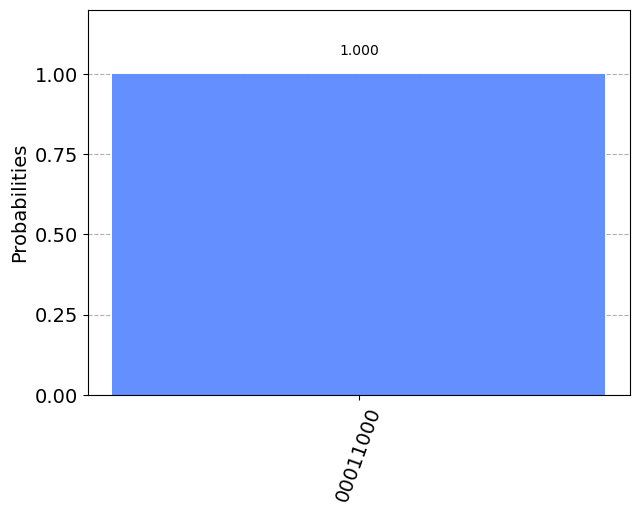

In [12]:
sim = Aer.get_backend('aer_simulator')
result = sim.run(qc_encode).result()
counts = result.get_counts()
plot_histogram(counts)

Quantum Circuit with CNOT gate/basic application

In [14]:
qc_cnot = QuantumCircuit(2)
qc_cnot.cx(0,1)
qc_cnot.draw()

┌───┐
q_0: ┤ X ├
     └─┬─┘
q_1: ──■──

In [17]:
qc = QuantumCircuit(2,2) #2 Quantum bits and 2 classical bits
qc.x(0)
qc.cx(0,1)
qc.measure(0,0)
qc.measure(1,1)
qc.draw()

┌───┐     ┌─┐   
q_0: ┤ X ├──■──┤M├───
     └───┘┌─┴─┐└╥┘┌─┐
q_1: ─────┤ X ├─╫─┤M├
          └───┘ ║ └╥┘
c: 2/═══════════╩══╩═
                0  1

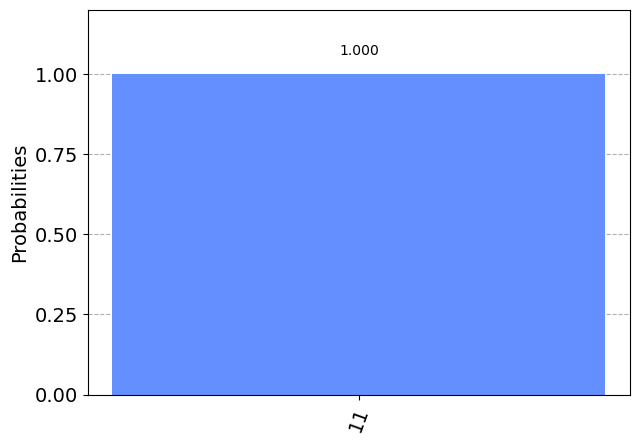

In [18]:
sim = Aer.get_backend('aer_simulator')
result = sim.run(qc).result()
counts = result.get_counts()
plot_histogram(counts)

Quantum Circuit Half-Adder

In [20]:
qc_ha = QuantumCircuit(4,2) #4 Quantum bits and 2 classical bits
qc_ha.x(0)
qc_ha.barrier()
qc_ha.cx(0,2)
qc_ha.cx(1,2)
qc_ha.ccx(0,1,3)
qc_ha.barrier()
qc_ha.measure(2,0)
qc_ha.measure(3,1)
qc_ha.draw()

┌───┐ ░                 ░       
q_0: ┤ X ├─░───■─────────■───░───────
     └───┘ ░   │         │   ░       
q_1: ──────░───┼────■────■───░───────
           ░ ┌─┴─┐┌─┴─┐  │   ░ ┌─┐   
q_2: ──────░─┤ X ├┤ X ├──┼───░─┤M├───
           ░ └───┘└───┘┌─┴─┐ ░ └╥┘┌─┐
q_3: ──────░───────────┤ X ├─░──╫─┤M├
           ░           └───┘ ░  ║ └╥┘
c: 2/═══════════════════════════╩══╩═
                                0  1

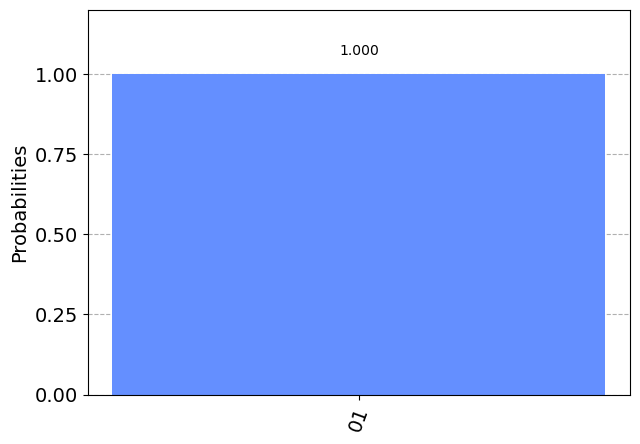

In [21]:
qobj = assemble(qc_ha)
counts = sim.run(qobj).result().get_counts()
plot_histogram(counts)

Represent 0.|0> + 1.|1> on Qiskit

In [26]:
q_circuit = QuantumCircuit(1)
initial_state = [0,1] # Initial state is |1>
q_circuit.initialize(initial_state, 0) #Initialize qubit 0 to |1>
q_circuit.save_statevector() #Save state vector
qobj = assemble(q_circuit)
result = sim.run(qobj).result()
out_state = result.get_statevector()
print(out_state)

Statevector([0.+0.j, 1.+0.j],
            dims=(2,))


In [27]:
q_circuit.measure_all()
q_circuit.draw()

┌─────────────────┐ ░  ░ ┌─┐
     q: ┤ Initialize(0,1) ├─░──░─┤M├
        └─────────────────┘ ░  ░ └╥┘
meas: 1/══════════════════════════╩═
                                  0

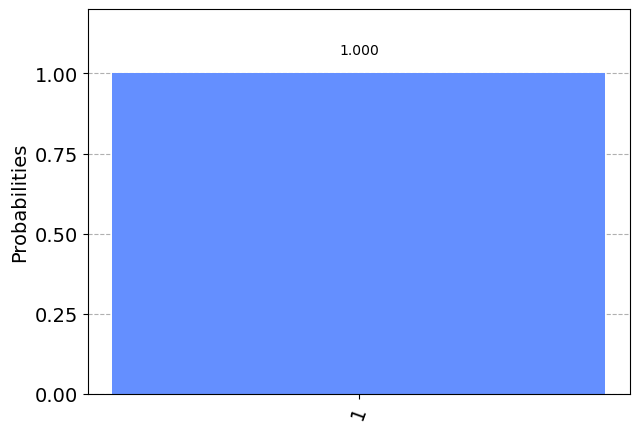

In [28]:
counts = result.get_counts()
plot_histogram(counts)

Represent 1/sqrt(2).|0> + 1/sqrt(2).|1> in Qiskit

In [32]:
qc = QuantumCircuit(1)
initial_state = [1/sqrt(2), 1j/sqrt(2)]
qc.initialize(initial_state, 0) #Initialize qubit 
qc.save_statevector() #Save state vector
qobj = assemble(qc)
state = sim.run(qobj).result().get_statevector()
print(state)

Statevector([0.70710678+0.j        , 0.        +0.70710678j],
            dims=(2,))


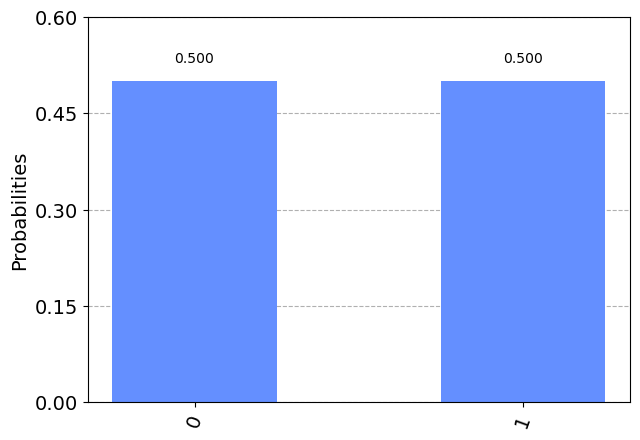

In [33]:
qobj = assemble(qc)
result = sim.run(qobj).result().get_counts()
plot_histogram(result)